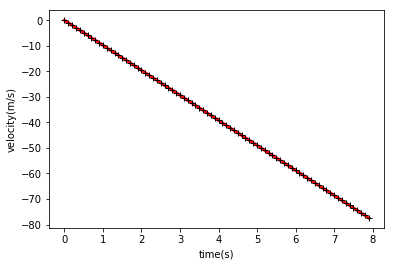

In [23]:
#//Challenge 2.3//

# k is determined by the terminal velocity which happenes when the net force is 0 then you move with const velocity 
#Terminal velocity is the highest velocity attainable by an object as it falls through a fluid (air is the most common example). 
#It occurs when the sum of the drag force (Fd) and the buoyancy is equal to the downward force of gravity (FG) acting on the object. 
#Since the net force on the object is zero.

#cause y is changing, decreasing as it goes downward therefore the force is increasing, 

#PART 1: #// Modify your code to simulate the fall of a particle from an altitude  y0  with zero initial velocity:

import numpy as np
from matplotlib import pyplot

class particle(object): #new thing: class defintions 
    
    def __init__(self, mass=1., y=0., v=0.): #we treated the object's position and velocity as first order ODE
        self.mass = mass #init what can you input in particle. every time you define a class then you have to put the first argument as self
        self.y = y
        self.v = v
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt #the Euler's method applied
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt



R = 6.37e6
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 300.          # initial position
v0 = 0.            # initial velocity
vt = 30.           # terminal velocity
#k2 = g*mass/vt**2  # drag coeff.

dt = 0.1           # time step

gforce = g*mass    # weight

p = particle(mass, y0, v0)

y = [y0] # since we do not know the size of the arrays, we define first a python list
v = [v0] # the append method is more efficient for lists than arrays
t = [0.]
#yarray = np.array (y)

while p.y > 0.:
    fy = (-gforce)/(1+(p.y/R)**2) #when you're falling your losing position 
    #Drag force #k2*p.v*abs(p.v) #abs() returns the absolute value of a number
    p.euler(fy, dt)
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1]+dt)
    #print (p.v)   
    
t_data = np.array(t) # we convert the list into a numpy array for plotting
y_data = np.array(y)
v_data = np.array(v)

#//comparing data
p1 = particle(mass, y0,v0)

y1 = [y0]
v1 = [v0]
t1 = [0.]

while p1.y >0.:
    fy1 = -gforce
    p1.euler(fy1,dt)
    y1.append(p1.y)
    v1.append(p1.v)
    t1.append(t1[-1]+dt)
    
t1_data = np.array(t1)
y1_data = np.array(y1)
v1_data = np.array(v1)

pyplot.plot(t_data, v_data, color="#FF0000", ls='-', lw=3)
pyplot.xlabel('time(s)');
pyplot.ylabel('velocity(m/s)'); 

pyplot.plot(t1_data, v1_data, "k+")
pyplot.xlabel('time(s)');
pyplot.ylabel('velocity(m/s)');


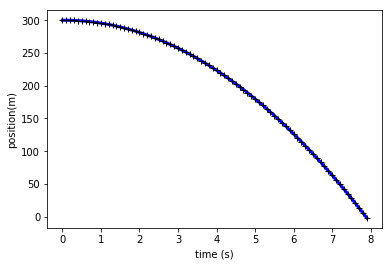

In [3]:
pyplot.plot(t_data, y_data, color="#0000FF", ls='-', lw=3)
pyplot.xlabel('time (s)');
pyplot.ylabel('position(m)');

pyplot.plot(t1_data, y1_data, "k+")
pyplot.xlabel('time (s)');
pyplot.ylabel('position(m)');

In [16]:
#PART 2: 
#changing the y0 and make it a range instead that's close to the radius of Earth in order to show the 10% difference
#compare velcoities when it hits ground for different ranges and print the difference, when did it show 10%?
import numpy as np


class particle(object): #new thing: class defintions 
    
    def __init__(self, mass=1., y=0., v=0.): #we treated the object's position and velocity as first order ODE
        self.mass = mass #init what can you input in particle. every time you define a class then you have to put the first argument as self
        self.y = y
        self.v = v
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt #the Euler's method applied
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt
        
R = 6.37e6
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
#y0 = 300.          # initial position
v0 = 0.            # initial velocity
vt = 30.           # terminal velocity
#k2 = g*mass/vt**2  # drag coeff.

dt = 100           # time step

gforce = g*mass    # weight


 # since we do not know the size of the arrays, we define first a python list
 # the append method is more efficient for lists than arrays

#yarray = np.array (y)

y0_range = np.linspace(0,30000,1000)

for i in range(0,len(y0_range)):
    #y0_range = y[i]
    p = particle(mass, y0_range[i], v0)
    y = [y0_range[i]]
    v = [v0]
    t = [0.]
    while p.y > 0.:
        fy = (-gforce)/(1+(p.y/R)**2) #when you're falling your losing position #Drag force #k2*p.v*abs(p.v) #abs() returns the absolute value of a number
        p.euler(fy, dt)
        y.append(p.y)
        v.append(p.v)
        t.append(t[-1]+dt)
        #print (p.v)   
        t_data = np.array(t) # we convert the list into a numpy array for plotting
        y_data = np.array(y)
        v_data = np.array(v)
    
    p1 = particle(mass, y0_range[i],v0)
    y1 = [y0_range[i]]
    v1 = [v0]
    t1 = [0.]
    while p1.y > 0.:
        fy1 = -gforce
        p1.euler(fy1,dt)
        y1.append(p1.y)
        v1.append(p1.v)
        t1.append(t1[-1]+dt)

        t1_data = np.array(t1)
        y1_data = np.array(y1)
        v1_data = np.array(v1)
#perecent = (abs(current - previous) / previous) * 100
    if v[-1] != 0:
        percent = abs(((v1[-1]-v[-1])/v[-1])*100)
        print (percent)
            #def get_change(v1[-1], v[-1]):
            #if v1[-1] == v[-1]:
                #return 100.0
            #try:  #The try block lets you test a block of code for errors
                #return (abs(current - previous) / previous) * 100.0
            #except ZeroDivisionError: #The except block lets you handle the error.
                #return 0
    if percent > 1: 
        print ('Intial Position', y0_range, 'Meters')
        print ('Final Speeds Percentage Difference', v0, '%')

2.222450069831992e-09
8.88983508201387e-09
2.000208543413741e-08
3.55592475319571e-08
5.5561344581017433e-08
8.000835338525739e-08
1.0890022754840586e-07
1.422370250816569e-07
1.8001874599390123e-07
2.2224535549312173e-07
2.6891686519127773e-07
3.2003329830221197e-07
3.7559463163816114e-07
4.3560087681464115e-07
5.000520338476551e-07
5.689480679522985e-07
6.422890603518304e-07
7.200749298609252e-07
8.02305699701724e-07
8.88981381496855e-07
9.80101963668736e-07
1.0756674810437628e-06
1.175677875643932e-06
1.2801331938987073e-06
1.389033401033853e-06
1.502378531880506e-06
1.620168551666801e-06
1.7424034952262454e-06
1.8690833393900428e-06
2.0002080957926765e-06
2.13577774126772e-06
2.2757923106534234e-06
2.4202517807857314e-06
2.569156151703171e-06
2.7225054582475486e-06
2.8802996424562703e-06
3.042538739173514e-06
3.209222760043246e-06
3.3803516819085227e-06
3.555925493214286e-06
3.7359442172087566e-06
3.920407842339246e-06
4.109316380255648e-06
4.302669831008345e-06
4.500468183048202e-

0.0017249816724347442
0.0017288998578047618
0.0017328224881183628
0.0017367495633069875
0.001740681083418087
0.0017446170484411092
0.0017485574583306985
0.0017525023131807155
0.0017564516129342058
0.0017604053575690213
0.0017643635470978166
0.0017683261815564513
0.001772293260911178
0.0017762647852094602
0.0017802407543827496
0.0017842211684437074
0.0017882060274281993
0.0017921953313140854
0.0017961890801372327
0.0018001872738523017
0.0018041899124719603
0.0018081969960088763
0.0018122085244177146
0.001816224497769151
0.0018202449160062513
0.0018242697791648907
0.00182829908721134
0.001832332840193077
0.0018363710380647743
0.0018404136808391088
0.0018444607685287604
0.0018485123010884034
0.0018525682786003264
0.0018566287010192064
0.0018606935683345251
0.0018647628805589678
0.0018688366376704178
0.001872914839704764
0.0018769974866398923
0.0018810845785232958
0.0018851761152516543
0.001889272096907267
0.0018933725234912258
0.0018974773949582203
0.001901586711355749
0.00190570047263850